<a href="https://colab.research.google.com/github/baker371/hash/blob/main/HASH_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
#!pip install pycaret

#!pip install pandas-profiling xgboost

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import pycaret
from   pycaret.classification import *
np.random.seed(42)
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from google.colab import drive
from ydata_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
tokeep = pd.read_csv('gdrive/MyDrive/datasets/tokeep_uphia.csv')
tokeep.head()

wanted
0  adcnloc_a
1  adcnloc_b
2  adcnloc_c
3  adcnloc_x
4  adcnloc_y

In [4]:
wanted = tokeep['wanted'].tolist()
wanted

['adcnloc_a',
 'adcnloc_b',
 'adcnloc_c',
 'adcnloc_x',
 'adcnloc_y',
 'adlvlsch',
 'admedll',
 'age',
 'cookingfuel',
 'educationuganda',
 'gender',
 'havetele',
 'havmobl',
 'healthc',
 'hhrmarital',
 'known_hiv_status',
 'occuptn',
 'region',
 'religion',
 'sexever',
 'sick3mo',
 'urban',
 'wealthquintile',
 'adcnloc',
 'hivtstlocation',
 'watersource',
 'householdid',
 'personid',
 'centroidid']

In [5]:
uphia = pd.read_csv('gdrive/MyDrive/datasets/uphia2016.csv')
uphia.head()

country     householdid          personid centroidid  region  indstatus  gender  age  relattohh  livehere  sleephere  sick3mo  emancipated  momalive  momhhm  femguardhhm  momfemname  dadalive  dadhhm  maleguardhhm  dadmalename  momsick  momhiv  dadsick  supportmed12  supportemot12  supportemot3  supportmater12  lngvqx  lngvint  lngvnat  trnsluse  schlat  schlcur  schcom  away12mo  work12mo  occuptn  ethnic  religion  evermar  curmar  numwif  numwifdk  reviewwife  npyn  npnum  wifliveew  wifliveewdk  huslivew  husotwif  husnwif  husnwifdk  pregnum  pregnumdk  liveb  childa2012  childa2012dk  prgtwin  pregnm  prgcare  hivtsbp  hivpsbp  arvfvst  hivtopg  hivtprg  hivrtpg  arvnrpg  brthwhr  hivtobr  hivttlb  offrarvs  arvtklb  birthyr1  childlive1  deathageyr1  deathdkref1  deathagemo1  childlivewith1  hhlnchild1  childbrstfd1  chtsthivbirth1  hhlnchild2  pregnant  avoidpreg cmethod_a cmethod_c cmethod_d cmethod_e cmethod_f cmethod_g cmethod_i cmethod_j cmethod_k cmethod_x cmethod_y cmethod_z  morechild nocontr_a nocontr_b nocontr_c nocontr_d nocontr_e nocontr_f nocontr_g nocontr_h nocontr_i nocontr_j nocontr_k nocontr_l nocontr_m nocontr_n nocontr_o nocontr_p nocontr_r nocontr_s nocontr_t nocontr_x nocontr_y nocontr_z  mcriskr  mcstatus  mcplans  mcage  mcagedk  mcwho  firstsxage  firstsxagedk  lifetimesex  lifetimesexdk  part12monum  part12modkr  partlivew1  partrelation1  partgend1  partage1  partagedk1  partlastcndm1  partlastetoh1  partlastsup1 partlastsupwhat_a1 partlastsupwhat_b1 partlastsupwhat_c1 partlastsupwhat_f1 partlastsupwhat_x1 partlastsupwhat_z1  partagain1  parthivtst1  partknowhiv1  parthivsat1  partlivew2  partrelation2  partgend2  partage2  partagedk2  partlastcndm2  partlastetoh2  partlastsup2 partlastsupwhat_a2 partlastsupwhat_b2 partlastsupwhat_c2 partlastsupwhat_f2 partlastsupwhat_x2 partlastsupwhat_z2  partagain2  parthivtst2  partknowhiv2  parthivsat2  partlivew3  partrelation3  partgend3  partage3  partagedk3  partlastcndm3  partlastetoh3  partlastsup3 partlastsupwhat_a3 partlastsupwhat_b3 partlastsupwhat_c3 partlastsupwhat_f3 partlastsupwhat_x3  partagain3  parthivtst3  partknowhiv3  parthivsat3  hivtstever hivtstnors_a hivtstnors_b hivtstnors_c hivtstnors_d hivtstnors_e hivtstnors_f hivtstnors_g hivtstnors_h hivtstnors_i hivtstnors_k hivtstnors_l hivtstnors_x hivtstnors_y hivtstnors_z  hivtestm  hivtesty  hivtstlocation  hivtstrslt  hivtfposm  hivtfposy  hivretestpos  hivretestposdk hivpostell_a hivpostell_b hivpostell_c hivpostell_d hivpostell_e hivpostell_x hivpostell_z  hivstathide  hivstatdeniedcare  hivcare  hivcfm  hivcfy  hivclm  hivcly  cd4testever  cd4ttm  cd4tty  arvstakenev  arvsnottake  arvftm  arvfty  arvsmissdays  arvsmissdaysdk  sptgrgo  sptgrfreq  sptgrfreqdk  tbclinvisit  tbdiagn  tbttretcurr  healthc  money  touchtimes  touchage  touchagedk  touchfstrel  touch12mo  touchlstrel  cmplsxtimes  cmplsxage  cmplsxagedk  mplsxfstrel  mplsx12mo  mplsxlstrel  frcsxtimes  frcsxage  frcsxagedk  rcsxrelat  frcsx12mo  prssxtimes  prssxage  prssxagedk  rssxrelat  prssx12mo  vlnc  vlncfrstage  vlncfrstagedk  vlnc12motimes  vlnc12moptnr  lnclstrel  lncinj lncinjspec_y  emnolove  emnever  emstupid  emfreq  emage  emagedk  emfstrel  em12mo  emlstrel  ind0040  refinrsnyn refinrsn1_a refinrsn1_b refinrsn1_c refinrsn1_d refinrsn1_e refinrsn2_g refinrsn2_h refinrsn2_i refinrsn2_j refinrsn2_k refinrsn2_l refinrsn2_m refinrsn2_n refinrsn2_o refinrsn2_p refinrsn2_q refinrsn2_r refinrsn2_s refinrsn2_t refinrsn3_u refinrsn3_v refinrsn3_w refinrsn3_x  refinhivtestyn  refbdrsnyn  refbdrsn_1  refbdrsn_10  refbdrsn_11  refbdrsn_12  refbdrsn_13  refbdrsn_14  refbdrsn_15  refbdrsn_16  refbdrsn_17  refbdrsn_2  refbdrsn_3  refbdrsn_4  refbdrsn_5  refbdrsn_6  refbdrsn_7  refbdrsn_8  refbdrsn_9  refbdrsn_96  partlastsxtimed1  partlastsxtimed2  partlastsxtimed3  partfirstsxtimed1  partfirstsxtimed2  partfirstsxtimed3  agegroupmonthslastchild  childbrstfddurw1  childfoodagem1  agegroup5population  urban  linenumfixed  know

In [6]:
uphia = uphia.drop_duplicates()
uphia.shape

(34716, 902)

In [7]:
# remove children

uphia= uphia[uphia['age'] > 17]
uphia.shape

(30566, 902)

In [8]:
# Dropping columns contained in the 'unwanted' list
df = uphia[[col for col in uphia.columns if col in wanted]]
df.shape

(30566, 17)

In [9]:
df.head()

householdid          personid centroidid  region  gender  age  sick3mo  occuptn  religion  hivtstlocation  healthc  urban  known_hiv_status  wealthquintile  educationuganda  hhrmarital  sexever
0  UG000000000001  UG00000000000101   UG000353       1       2   50      2.0      4.0       2.0            21.0      NaN      2               2.0             4.0                3           4        1
1  UG000000000001  UG00000000000102   UG000353       1       2   19      2.0      5.0       1.0             5.0      NaN      2               2.0             4.0                2           5        1
2  UG000000000002  UG00000000000201   UG000279       7       2   32      2.0      NaN       7.0             3.0      1.0      2               2.0             4.0                2           1        1
4  UG000000000002  UG00000000000209   UG000279       7       1   24      2.0      NaN       7.0             5.0      NaN      2               2.0             4.0                2           2        1
6  UG000000000002  UG00000000000211   UG000279       7       2   20      2.0      NaN       7.0             5.0      NaN      2               2.0             4.0                2           5        1

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30566 entries, 0 to 34715
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   householdid       30566 non-null  object 
 1   personid          30566 non-null  object 
 2   centroidid        30566 non-null  object 
 3   region            30566 non-null  int64  
 4   gender            30566 non-null  int64  
 5   age               30566 non-null  int64  
 6   sick3mo           28460 non-null  float64
 7   occuptn           14502 non-null  float64
 8   religion          26191 non-null  float64
 9   hivtstlocation    21826 non-null  float64
 10  healthc           16824 non-null  float64
 11  urban             30566 non-null  int64  
 12  known_hiv_status  26498 non-null  float64
 13  wealthquintile    30565 non-null  float64
 14  educationuganda   30566 non-null  int64  
 15  hhrmarital        30566 non-null  int64  
 16  sexever           30566 non-null  int64 

In [11]:
#Mode imputation for dealing with missing values
df = df.fillna(df.mode().iloc[0])

In [12]:
# Data Labellling

df['outcome'] = 0

df.loc[(df['wealthquintile']>3) | (df['occuptn'].isin([1,2,3,4])), 'outcome'] = 1


<Axes: ylabel='Density'>

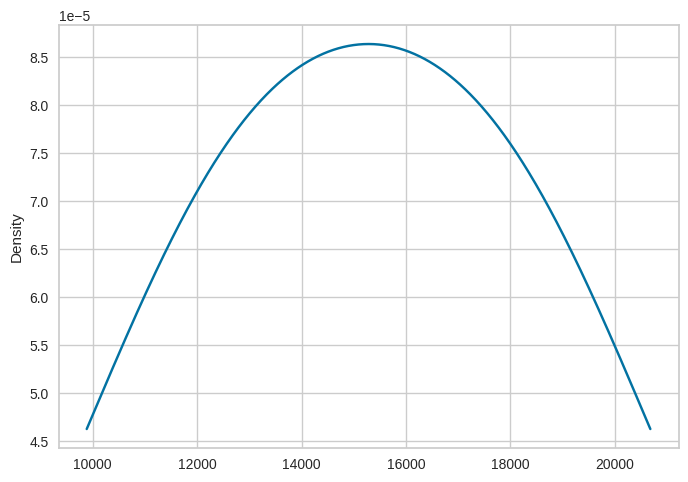

In [13]:
# Target/Dependent variable is the Outcome Column. It shows if someone will be able to buy (1) or not (0)

df.outcome.value_counts().plot(kind= "density")

<Axes: >

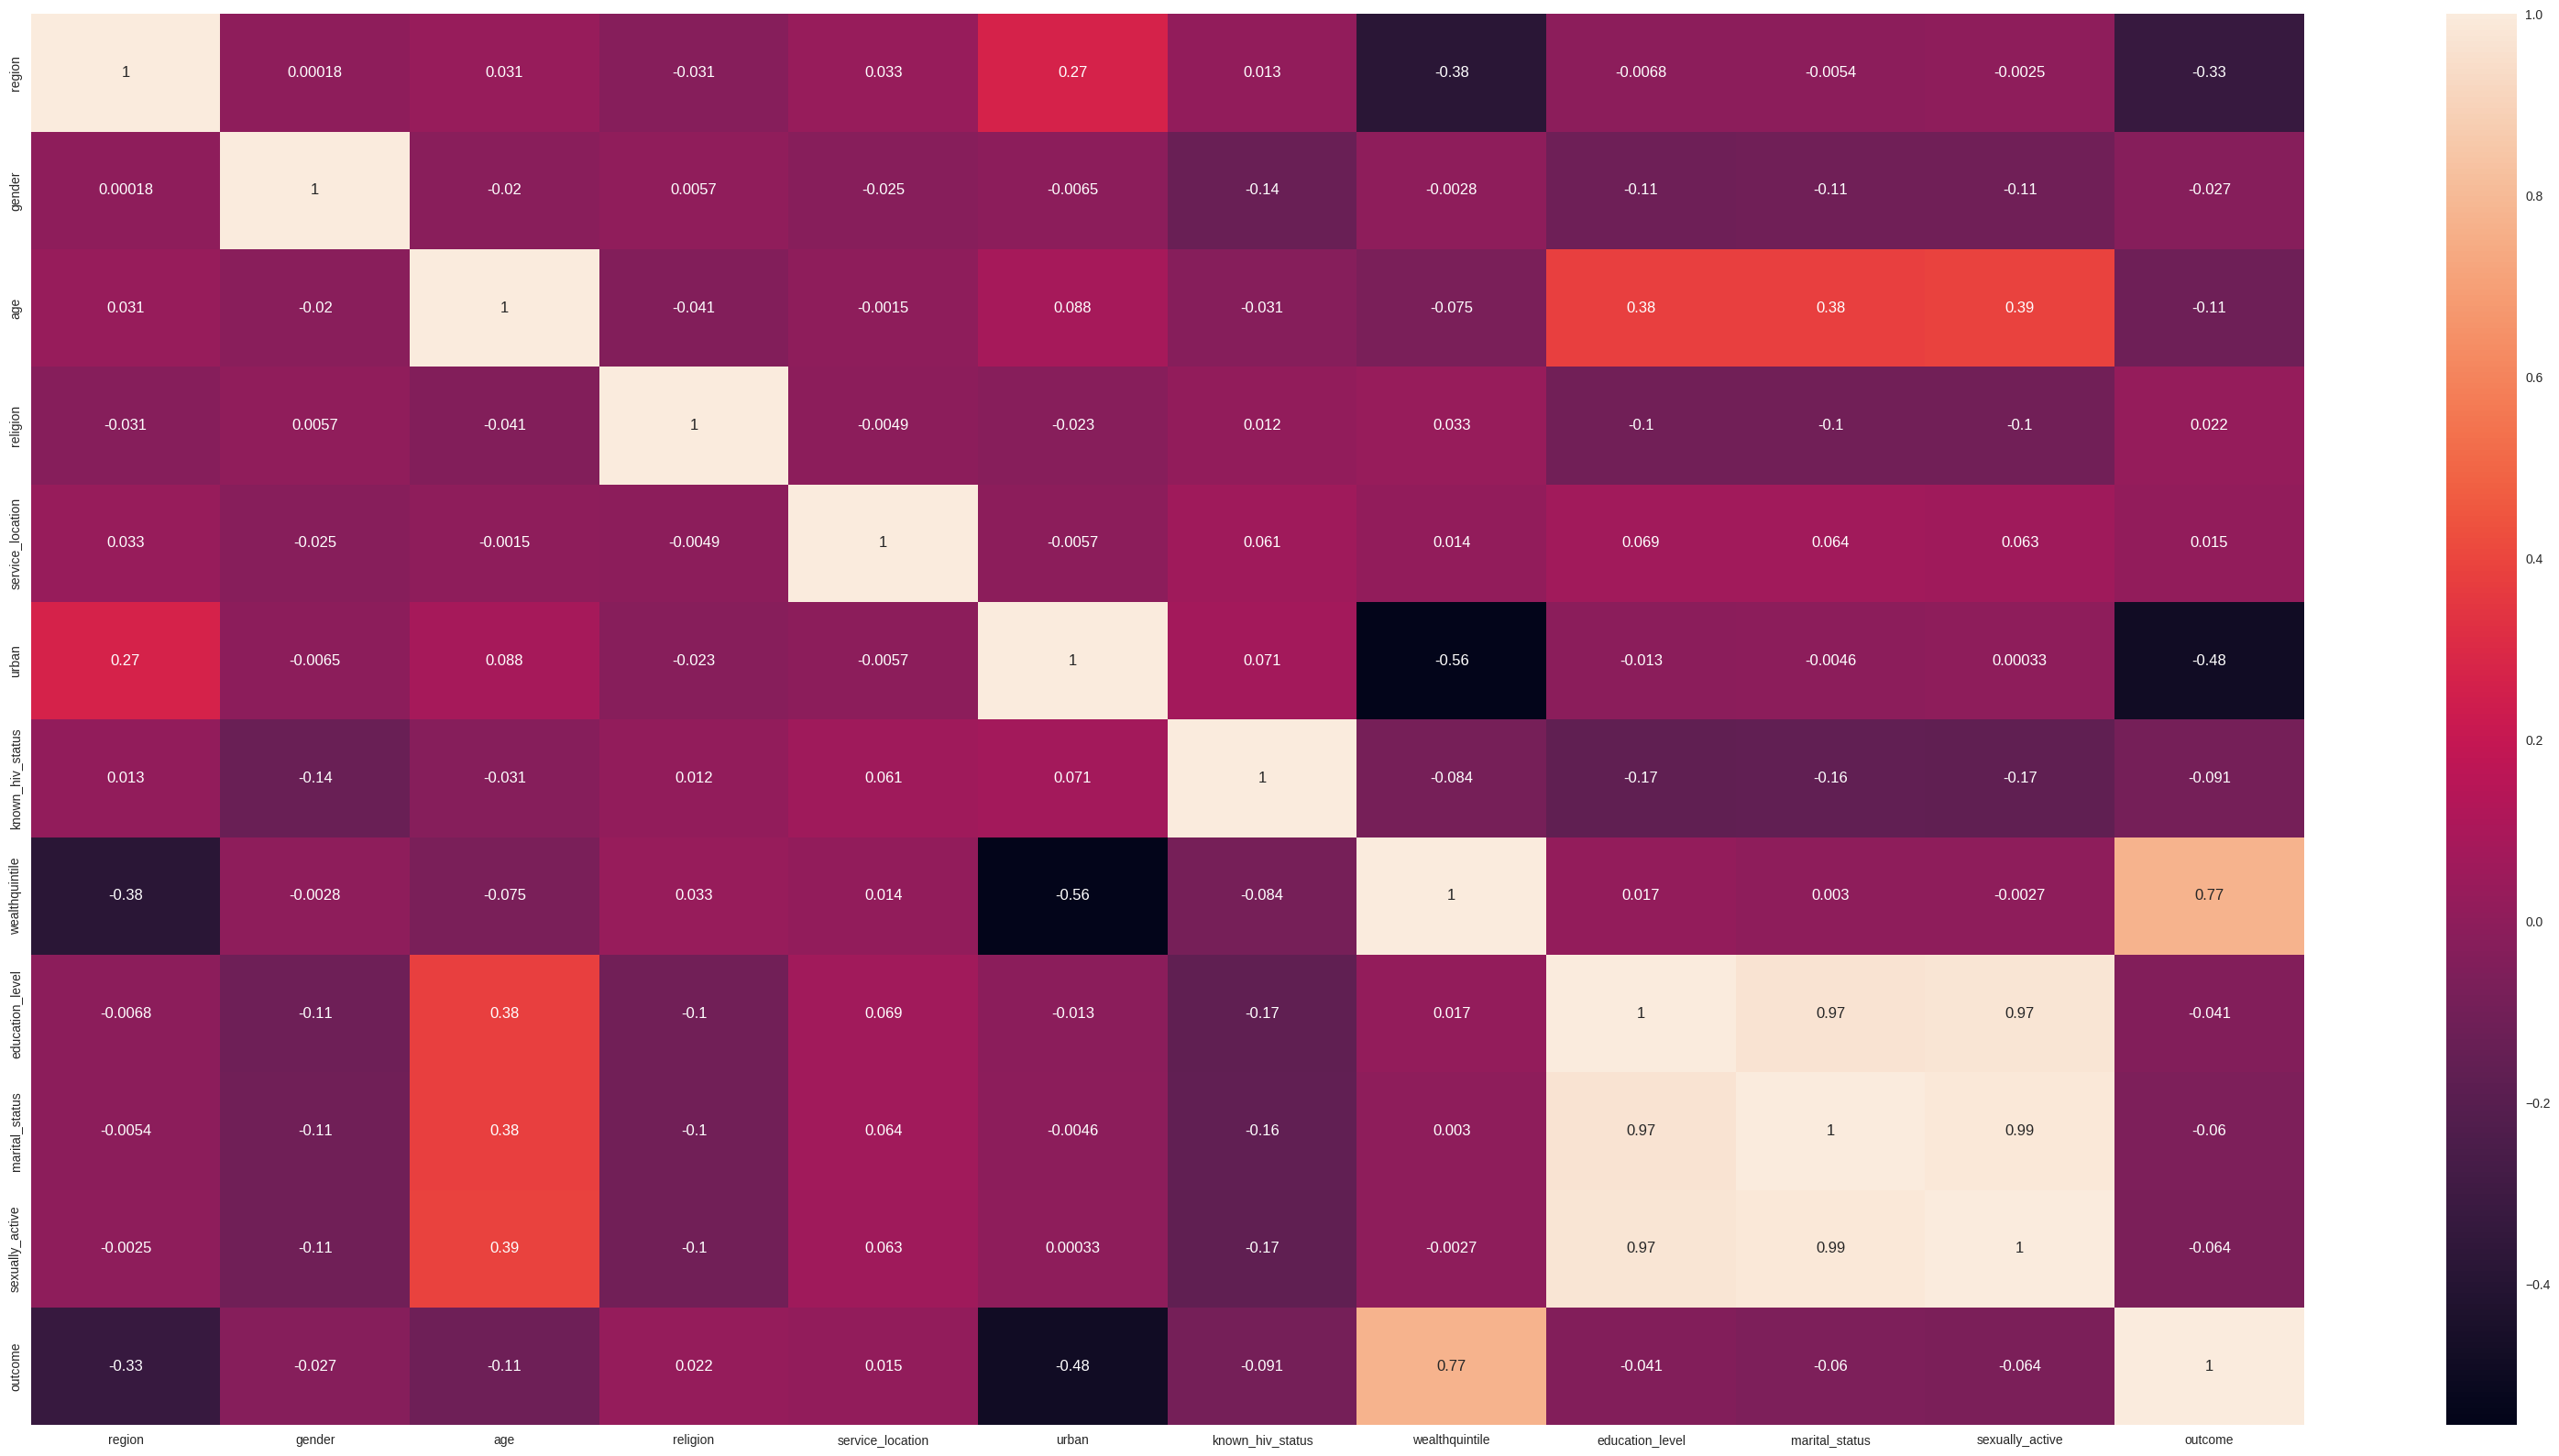

In [24]:
# Correlation Heatmap to show the relationship between the different features
fig, ax = plt.subplots(figsize = (40, 20))

corr = df.corr()
sns.heatmap(corr, annot = True)

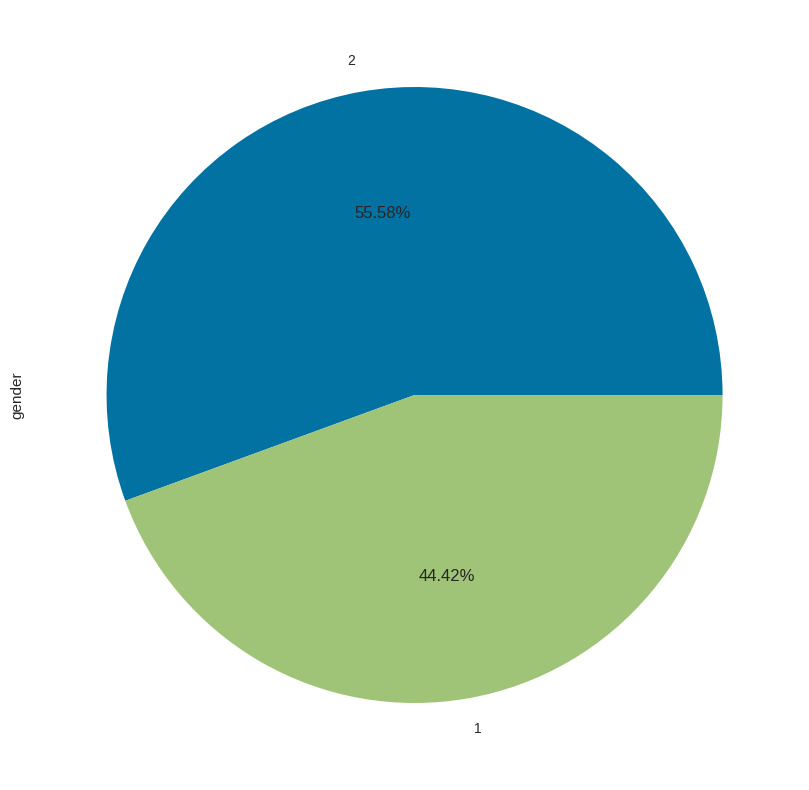

<Figure size 800x550 with 0 Axes>

In [25]:
# Gender Distribution 1 = Male, 2 = Female

plt.figure(figsize=(15,10))
df['gender'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()
plt.savefig('gender.png')  # Exporting image

In [14]:
# Show Report
report = ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
# Data Clean up

# Remove duplicates

df = df.drop(['householdid','personid','centroidid','sick3mo','occuptn','healthc'], axis=1)

df.shape

(30566, 12)

In [16]:
# Renaming columns
df = df.rename(columns={'hivtstlocation': 'service_location', 'educationuganda': 'education_level', 'hhrmarital': 'marital_status','sexever':'sexually_active'})
df.to_csv('uphia_sample.csv', index=False)

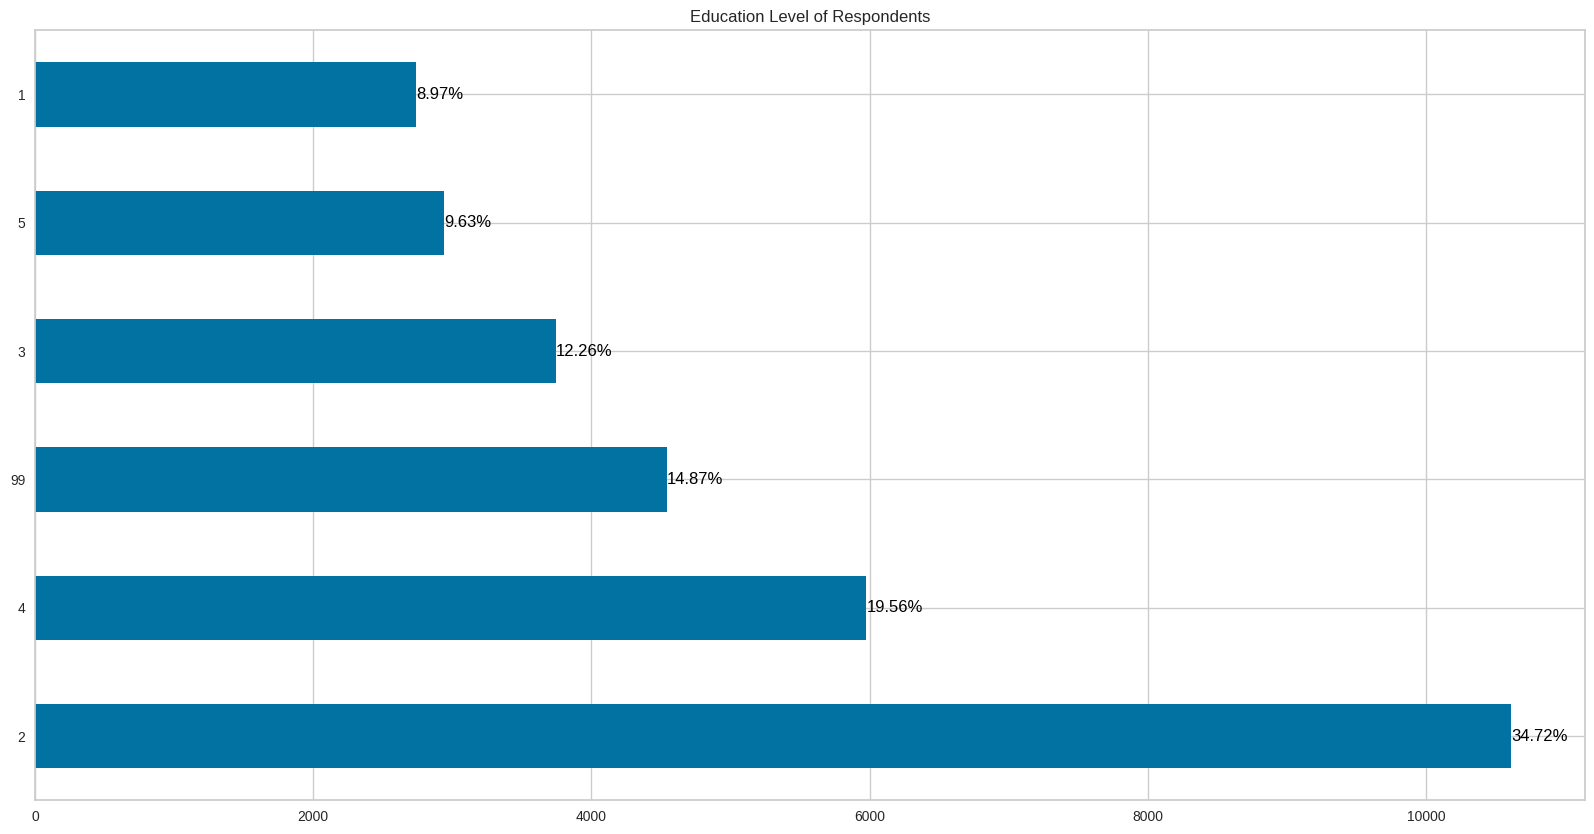

In [27]:
# Education Levels

# 1 - No formal education
#2  - Some primary
#3  - Completed primary
#4  - Some secondary
#5  - Completed secondary
#99 - Missing

df['education_level'].value_counts().head(30).plot(kind='barh', figsize=(20,10), title="Education Level of Respondents")

# Calculate the percentage for each bar
total = df['education_level'].value_counts().sum()
for i, v in enumerate(df['education_level'].value_counts().head(30)):
    percentage = f"{(v / total) * 100:.2f}%"
    plt.text(v, i, percentage, color='black', va='center')

# Display the graph
plt.show()

In [17]:
# Setting our source data source, with the target as disease. The model will be split on 80 training and 20 testing

try:
    clf = setup(data=df, target='outcome', train_size=0.8, fold_shuffle=True, session_id=2)
except AttributeError:
    pass

In [18]:
# Finding the best model by sorting out the highest area under the curve (AUC)

compare_models(sort='AUC')

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=2, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [19]:
gbc = create_model('gbc')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [20]:
tuned_gbc = tune_model(gbc, optimize='AUC')
tuned_gbc

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='log_loss', max_depth=7,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.002, min_samples_leaf=5,
                           min_samples_split=9, min_weight_fraction_leaf=0.0,
                           n_estimators=270, n_iter_no_change=None,
                           random_state=2, subsample=0.65, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [21]:
# launch evaluate widget

evaluate_model(tuned_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [22]:
# The test consists of remaining 20% of data that PyCaret automatically split on the setup, it's important to see that the model is not overfitting.

predict_model(tuned_gbc)

region  gender  age  religion  service_location  urban  known_hiv_status  wealthquintile  education_level  marital_status  sexually_active  outcome  prediction_label  prediction_score
34545       3       2   48       1.0               5.0      1               2.0             5.0                4               1                1        1                 1            0.9606
12136       5       1   80       1.0              12.0      2               2.0             4.0               99              99               99        1                 1            0.9606
14794       9       2   29       3.0               5.0      2               2.0             3.0                2               3                1        0                 0            0.8917
10473       1       1   39       1.0               5.0      1               2.0             5.0                5               1                1        1                 1            0.9606
10814       1       2   27       7.0               5.0      2               2.0             4.0                4               1                1        1                 1            0.9606
...       ...     ...  ...       ...               ...    ...               ...             ...              ...             ...              ...      ...               ...               ...
23843       2       1   37       5.0              12.0      2               2.0             3.0                2               1                1        1                 0            0.8416
10707       5       2   45       3.0              12.0      2               2.0             2.0                3               1                1        1                 0            0.8837
12114       1       2   30       1.0               5.0      1               1.0             4.0                2               1                1        1                 1            0.9606
9143        8       2   28       1.0              12.0      2               2.0             1.0                4               1                1        0                 0            0.8105
9625        1       2   42       1.0               5.0      1               1.0             5.0                2               4                1        1                 1            0.9606

[6114 rows x 14 columns]

In [23]:
# Save the model

try:
    save_model(tuned_gbc, 'hash_gbc')
except AttributeError:
    pass

Transformation Pipeline and Model Successfully Saved
